#### Denizkulağının yaşı(abalone), kabuğun koni boyunca kesilmesi, boyanması ve mikroskopta halka sayısının sayılmasıyla belirlenir. Elimizde olan ölçümler yaşı tahmin etmek için kullanılır.

##### NOT!! : Denizkulağının yaşı = $rings+1.5$

#### Üzerinde çalışacağımız veriyi çekelim:

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None)
abalone_data.columns = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings']


In [2]:
abalone_data.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone_data.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

In [4]:
# Verimizde bulunan sex değişkeni kategorik bir değişken olduğu için bunu sayısal bir değişken olarak güncelliyoruz.
abalone_data = pd.get_dummies(abalone_data, columns=["sex"])
abalone_data.dtypes

length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
sex_F               uint8
sex_I               uint8
sex_M               uint8
dtype: object

In [5]:
abalone_data.head()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
whole_weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
shucked_weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
viscera_weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
shell_weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000
sex_F,4177.0,0.312904,0.463731,0.0000,0.0000,0.0000,1.000,1.0000
sex_I,4177.0,0.321283,0.467025,0.0000,0.0000,0.0000,1.000,1.0000


In [7]:
# veride eksik gözlem var mı diye kontrol edelim:
abalone_data.isnull().sum()

length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
sex_F             0
sex_I             0
sex_M             0
dtype: int64

<AxesSubplot: >

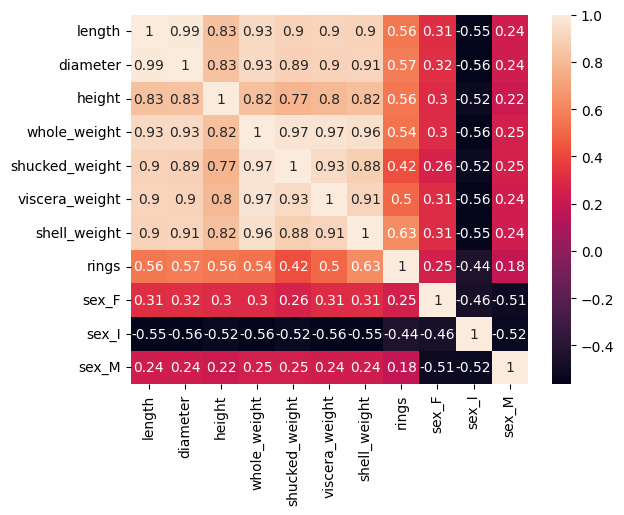

In [8]:
# Aralarındaki ilişkiyi kontrol edelim;
import seaborn as sbn
sbn.heatmap(abalone_data.corr(),annot = True)


Korelasyon matrisi incelendiğinde bağımlı değişken (rings) ile bağımsız değişkenler arasındaki ilşikilerin çoğu pozitif yönlü görünüyor.
 
 
 Matris incelendiğinde bağımsız değişkenler arasında ilişki olduğu görülmektedir. En çokta length ve diameter arasındaki yüksek oranda ilişkiyi görebiliyoruz
 
 Bu da bize multicolinerty (çoklu bağlantı sorunu) sorunu olabileceğini söyler.


#### ---- Aykırı değerleri çıkarma

In [9]:
# Z-skoru yöntemi ile aykırı değerleri belirlemek için
from scipy import stats
z_scores = stats.zscore(abalone_data.iloc[:, 1:]) # Sayısal değişkenler için z-skorlarını hesaplamak için
outliers = (z_scores < -3) | (z_scores > 3) # Z-skoru -3'ten küçük veya 3'ten büyük olan değerleri bulmak için
outlier_rows = outliers.any(axis=1) # Herhangi bir sütunda aykırı değer olan satırları bulmak için

# Aykırı değerleri silmek veya değiştirmek için
# Seçenek 1: Aykırı değerleri silmek için
abalone_data = abalone_data[~outlier_rows] # Aykırı değer olmayan satırları seçmek için


### Model oluşturma:

In [10]:
from sklearn.model_selection import train_test_split
random_state = 32
x = abalone_data.drop("rings", axis = 1) # bağımsız değişkenlerin seçimi
y = abalone_data["rings"] # bağımlı değişkenin seçimi
x_egitim, x_test, y_egitim, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32) 

In [11]:
x_egitim.shape

(3224, 10)

In [12]:
x_test.shape

(807, 10)

#### ----  Çoklu Doğrusal regresyon modeli ;

In [13]:
import statsmodels.api as sm
model = sm.OLS(y_egitim, x_egitim)
mod = model.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rings   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     406.6
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:37:53   Log-Likelihood:                -6770.3
No. Observations:                3224   AIC:                         1.356e+04
Df Residuals:                    3214   BIC:                         1.362e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
length             1.0577      1.866      0.567      0.571      -2.601       4.716
diameter           8.2463      2.334      3.532      0.000       3.669      12.824
height            18.8038      2.455      7.660      0.000      13.991      23.617
whole_weight       7.3161      0.805      9.086      0.000       5.737       8.895
shucked_weight   -17.9056      0.909    -19.694      0.000     -19.688     -16.123
viscera_weight    -8.0338      1.422     -5.649      0.000     -10.822      -5.245
shell_weight       7.9073      1.335      5.923      0.000       5.290      10.525
sex_F              3.4820      0.324     10.738      0.000       2.846       4.118
sex_I              2.6878      0.302      8.898      0.000       2.096       3.280
sex_M              3.5062      0.317     11.050      0.000       2.884       4.128
==============================================================================
Omnibus:                      547.693   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1046.840
Skew:                           1.041   Prob(JB):                    4.80e-228
Kurtosis:                       4.861   Cond. No.                         114.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Test istatistiklerinin length hariç tüm değişkenleri anlamlı olarak gösterdiğini görebiliriz.
##### adj R2 nin 0.552 olduğunu görüyoruz ve bu isteyeceğimiz bir değer değil, 1 e ne kadar yakın olursa o kadar iyi


In [14]:
# Lazım olabilecek metrikler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
# aic
from math import log
def AIC(n, mse, p):
    params = len(p.coef_) + 1
    aic = n * log(mse) + 2 * params
    return aic



In [15]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression().fit(x_egitim, y_egitim)
lr_fit = lr_model.predict(x_egitim)
mean_squared_error(y_egitim, lr_fit), r2_score(y_egitim, lr_fit)


(3.9042546710181028, 0.5324156977696373)

In [16]:
lr_pred = lr_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, lr_pred), " R2:", r2_score(y_test, lr_pred), " MAPE:", mean_absolute_percentage_error(y_test, lr_pred), " AIC:", AIC(len(lr_pred), mean_squared_error(y_test, lr_pred), lr_model))

MSE: 3.8504619155582773  R2: 0.5010858301737653  MAPE: 0.15342191158111668  AIC: 1109.991847170178


<AxesSubplot: xlabel='rings'>

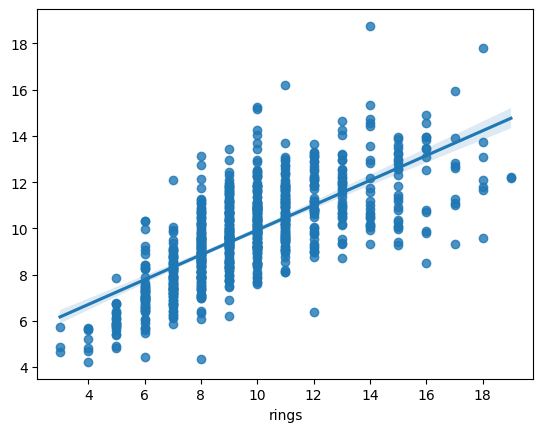

In [17]:
import seaborn as sbn
sbn.regplot(x = y_test, y = lr_pred)

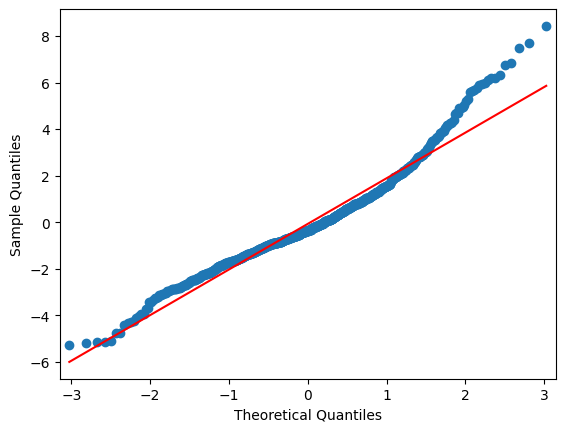

In [18]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
residuals = y_test - lr_pred
sm.qqplot(residuals, line="s") 
plt.show()
#QQ plot’tan görüldüğü gibi artıkların dağılımı uç tarafta normal dağılıma yakın değildir.

#### ----  Temel Bileşenler Regresyonu (PCR) modeli ;

In [19]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.model_selection import RepeatedStratifiedKFold

In [20]:
pca = PCA(n_components=5)
x_egitim_pca = pca.fit_transform(x_egitim)
pca_model = LinearRegression().fit(x_egitim_pca, y_egitim)
x_test_pca = pca.transform(x_test)
pca_pred = pca_model.predict(x_test_pca)
print("MSE:",mean_squared_error(y_test, pca_pred)," R2:", r2_score(y_test, pca_pred),
      " MAPE:", mean_absolute_percentage_error(y_test, pca_pred), " AIC:",AIC(len(pca_pred), mean_squared_error(y_test, pca_pred), pca_model))


MSE: 4.058865294269251  R2: 0.4740824729250045  MAPE: 0.15794974882395194  AIC: 1142.5290844570852


#### ----  Kısmi En Küçük Kareler regresyonu (PLS) modeli ;

<AxesSubplot: xlabel='rings'>

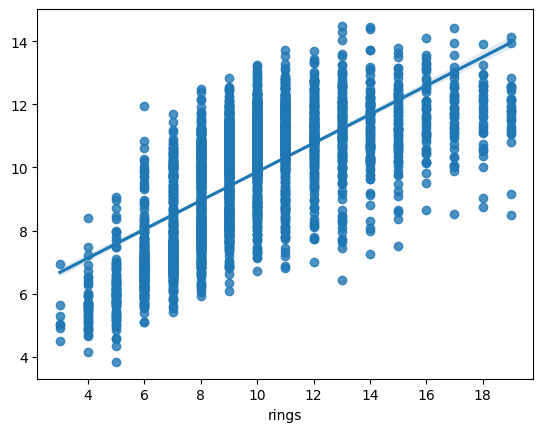

In [21]:
from sklearn.cross_decomposition import PLSRegression

pls_model = PLSRegression().fit(x_egitim, y_egitim)
pls_pred = pls_model.predict(x_egitim)
sbn.regplot(x = y_egitim, y = pls_pred)

In [22]:
pls_model1 = PLSRegression(n_components=4).fit(x_egitim, y_egitim)
pls_pred1 = pls_model1.predict(x_egitim)
mean_squared_error(y_egitim, pls_pred1), r2_score(y_egitim, pls_pred1)


(4.095393614420276, 0.5095243709965176)

In [23]:
# Optimizasyon işlemi
from sklearn.model_selection import cross_val_predict

def optimum_pls(x, y, ncomp):
    model = PLSRegression(n_components=ncomp)
    cvstep = cross_val_predict(model, x, y, cv = 10)
    rsq = r2_score(y, cvstep)
    mse = mean_squared_error(y, cvstep)
    return(cvstep, rsq, mse)

rsq_sonuc = []
mse_sonuc = []
for i in np.arange(1, 10):
    cvstep, rsq, mse = optimum_pls(x_egitim, y_egitim, i)
    rsq_sonuc.append(rsq)
    mse_sonuc.append(mse)

rsq_sonuc,mse_sonuc

([0.36572451328036615,
  0.4512868267812502,
  0.5054814492947439,
  0.5096401850709286,
  0.5197743248304074,
  0.5219318482016373,
  0.5284823711199442,
  0.5291314411051934,
  0.5295198734574846],
 [5.296099590865621,
  4.581667860468557,
  4.129151368612233,
  4.094426585290274,
  4.009808127604749,
  3.9917931500706985,
  3.9370973239289313,
  3.931677692624718,
  3.928434344166325])

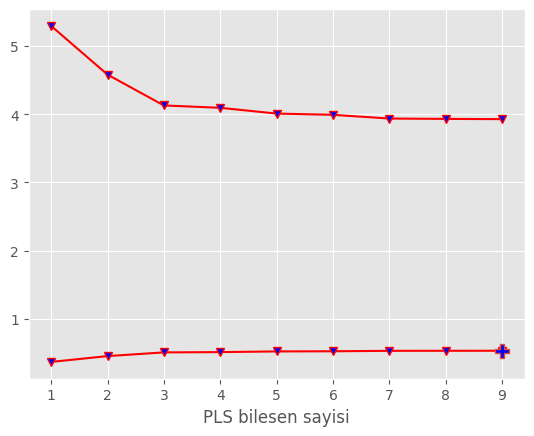

In [24]:
import matplotlib.pyplot as mp
def pls_grafigi(degerler, y_ekseni, fonk):
    with mp.style.context("ggplot"):
        mp.plot(np.arange(1, 10), np.array(degerler), "-v", color = "red", mfc = "blue")
        if fonk == "min":
            indeks = np.argmin(degerler)
        else:
            indeks = np.argmax(degerler)
            mp.plot(np.arange(1, 10)[indeks], np.array(degerler)[indeks], "P", ms = 10, mfc = "blue")
            mp.xlabel("PLS bilesen sayisi")
            
pls_grafigi(mse_sonuc, "MSE", "min")
pls_grafigi(rsq_sonuc, "R2", "max")

#### ----  Ridge regresyon modeli;

In [25]:
from sklearn.linear_model import Ridge
ridge_model = Ridge().fit(x_egitim, y_egitim)
ridge_pred = ridge_model.predict(x_egitim)
mean_squared_error(y_egitim, ridge_pred), r2_score(y_egitim, ridge_pred)

(3.9476596577098424, 0.527217396909237)

In [26]:
# Lambda optimizasyonu
rsq = []
mse_sonuc = []
alpha_cand = np.array([0, 0.05, 0.1, 0.2, 0.5, 1, 5, 10])
for i in alpha_cand:
    model_i = Ridge(alpha=i).fit(x_egitim, y_egitim)
    yhats = model_i.predict(x_egitim)
    rsq.append(r2_score(y_egitim, yhats))
    mse_sonuc.append(mean_squared_error(y_egitim, yhats))

<AxesSubplot: xlabel='rings'>

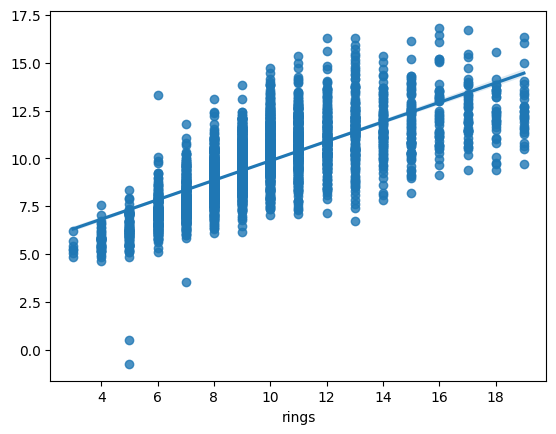

In [27]:
sbn.regplot(x = y_egitim, y = ridge_pred)

In [28]:
mse_sonuc, rsq

([3.9077899639423075,
  3.9046795073861422,
  3.9057602973884595,
  3.909111824118337,
  3.922792722772159,
  3.9476596577098424,
  4.154413228089625,
  4.3848349896613],
 [0.5319923013433193,
  0.5323648181950577,
  0.5322353798049746,
  0.5318339917246762,
  0.5301955295878649,
  0.527217396909237,
  0.5024560193645551,
  0.4748600739968091])

#### ---- Lasso Regresyon modeli;

In [29]:
from sklearn.linear_model import Lasso, LassoCV
lasso = Lasso(alpha=1.0)
lasso.fit(x_egitim, y_egitim)
lasso_pred = lasso.predict(x_test)

In [30]:
# Lambda optimizasyonu ugulayalım:
lasso_cv = LassoCV(cv=10)
lasso_cv.fit(x_egitim, y_egitim)
lasso_cv.alpha_
lasso_opt = Lasso(alpha=lasso_cv.alpha_)
lasso_opt_model = lasso_opt.fit(x_egitim, y_egitim)
lasso_pred_opt = lasso_opt.predict(x_test)

print("MSE:",mean_squared_error(y_test, lasso_pred_opt)," R2:", r2_score(y_test, lasso_pred_opt),
      " MAPE:", mean_absolute_percentage_error(y_test, lasso_pred_opt), " AIC:",AIC(len(lasso_pred_opt), mean_squared_error(y_test, lasso_pred_opt), lasso_opt_model))

MSE: 3.8635095722451216  R2: 0.4993952120227867  MAPE: 0.15395624230974828  AIC: 1112.7218207005021


#### ---- K-en yakın komşu (KNN) regresyon modeli;

In [31]:
from sklearn.neighbors import KNeighborsRegressor
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_egitim, y_egitim)
KNN_pred = KNN_model.predict(x_test)

In [32]:
## Grid Search kullanarak en iyi K degerini belirleyelim
from sklearn.model_selection import GridSearchCV
k_params = {"n_neighbors": [3, 5, 7, 9, 11, 13, 15, 17, 19, 21], "metric": ["euclidean", "manhattan", "minkowski"], "weights": ["uniform", "distance"]}
KNN_arg = KNeighborsRegressor()
KNN_model = GridSearchCV(KNN_arg, k_params, cv=5) 
KNN_model.fit(x_egitim, y_egitim)
KNN_model.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

In [33]:
# GridSearch ile bulduğumuz en iyi parametreler ile tekrar model oluşturuyoruz.
best_KNN_model = KNeighborsRegressor(n_neighbors = 15 , metric = "euclidean", weights = "distance").fit(x_egitim, y_egitim)
best_KNN_pred = best_KNN_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, best_KNN_pred)," R2:", r2_score(y_test, best_KNN_pred),
      " MAPE:", mean_absolute_percentage_error(y_test, best_KNN_pred))

MSE: 3.7509049153289404  R2: 0.513985684583209  MAPE: 0.14789554708650832


#### ---- Support Vector Machine (SVR) Regresyon modeli;

In [34]:
from sklearn.svm import SVR

In [35]:
# Dogrusal olan SVR

SVR_model = SVR(kernel = "linear").fit(x_egitim, y_egitim)
SVR_pred_l = SVR_model.predict(x_egitim)

mean_squared_error(y_egitim, SVR_pred_l), r2_score(y_egitim, SVR_pred_l)

SVR_predicted_l = SVR_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, SVR_predicted_l)," R2:", r2_score(y_test, SVR_predicted_l),
      " MAPE:", mean_absolute_percentage_error(y_test, SVR_predicted_l), " AIC:",AIC(len(SVR_predicted_l), mean_squared_error(y_test, SVR_predicted_l), SVR_model))

MSE: 4.192669708345294  R2: 0.4567450937658717  MAPE: 0.14709934839316052  AIC: 1160.7035181935737


In [36]:
# Dogrusal olmayan SVR
SVR_model_nl = SVR(kernel="rbf").fit(x_egitim, y_egitim)
SVR_pred_nl = SVR_model_nl.predict(x_egitim)
mean_squared_error(y_egitim, SVR_pred_nl)
r2_score(y_egitim, SVR_pred_nl)

SVR_predicted_nl = SVR_model_nl.predict(x_test)
print("MSE:",mean_squared_error(y_test, SVR_predicted_nl)," R2:", r2_score(y_test, SVR_predicted_nl),
      " MAPE:", mean_absolute_percentage_error(y_test, SVR_predicted_nl))

MSE: 3.9390794252931616  R2: 0.4896034334455177  MAPE: 0.1448823698515225


In [37]:
# Grid Search uygulaması
params_svr = {"C":np.arange(0.1, 2, 0.4)}
SVR_model_l_gs = GridSearchCV(SVR_model, params_svr, cv = 10).fit(x_egitim, y_egitim)
SVR_model_nl_gs = GridSearchCV(SVR_model_nl, params_svr, cv = 10).fit(x_egitim, y_egitim)
 
SVR_model_l_gs.best_params_
SVR_model_nl_gs.best_params_

bp = pd.Series(SVR_model_l_gs.best_params_)[0]

best_SVR_model_l = SVR(kernel="linear", C = bp).fit(x_egitim, y_egitim)
best_SVR_model_nl = SVR(kernel="rbf", C = bp).fit(x_egitim, y_egitim)

best_SVR_model_l_pred = best_SVR_model_l.predict(x_test)
best_SVR_model_nl_pred = best_SVR_model_nl.predict(x_test)

print("MSE_l:",mean_squared_error(y_test, best_SVR_model_l_pred)," R2_l:", r2_score(y_test, best_SVR_model_l_pred),
      " MAPE_l:", mean_absolute_percentage_error(y_test, best_SVR_model_l_pred), " AIC_l:",AIC(len(best_SVR_model_l_pred), mean_squared_error(y_test, best_SVR_model_l_pred), best_SVR_model_l))
print("MSE_nl:",mean_squared_error(y_test, best_SVR_model_nl_pred)," R2_nl:", r2_score(y_test, best_SVR_model_nl_pred),
      " MAPE_nl:", mean_absolute_percentage_error(y_test, best_SVR_model_nl_pred))

MSE_l: 4.106563997425862  R2_l: 0.46790203031602506  MAPE_l: 0.14640737228989945  AIC_l: 1143.9574414778244
MSE_nl: 3.785447332885434  R2_nl: 0.5095099354505259  MAPE_nl: 0.14215521941836695


#### ---- Yapay Sinir Aglari (ANN) modeli;

In [38]:
from sklearn.preprocessing import  StandardScaler
from sklearn.neural_network import MLPRegressor

# Veriyi ölçeklendirme:
sc = StandardScaler()
x_egitim_scaled = sc.fit_transform(x_egitim)
x_test_scaled = sc.transform(x_test)

# Modeli tanımlama:
ann_model = MLPRegressor(hidden_layer_sizes=(16, 8), activation="relu", solver="adam").fit(x_egitim_scaled, y_egitim)


y_hat_ann0 = ann_model.predict(x_egitim_scaled)
print("MSE:",mean_squared_error(y_egitim, y_hat_ann0)," R2:", r2_score(y_egitim, y_hat_ann0),
      " MAPE:", mean_absolute_percentage_error(y_egitim, y_hat_ann0))

y_predict_ann0 = ann_model.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test, y_predict_ann0)," R2:", r2_score(y_test, y_predict_ann0),
      " MAPE:", mean_absolute_percentage_error(y_test, y_predict_ann0))



MSE: 3.6404919622947536  R2: 0.5640046468790039  MAPE: 0.14579642963890657
MSE: 3.52888924377212  R2: 0.5427528213300024  MAPE: 0.14823671758595522


In [39]:
# Grid Search ile optimizasyon
ann_params = {"hidden_layer_sizes": [(32, 16), (64, 32), (128, 64)], 
              "activation": ["relu", "tanh"], 
              "solver": ["adam", "sgd"], "max_iter": [50, 100]}

ann_model_gs = GridSearchCV(ann_model, ann_params, cv=3)
ann_model_gs.fit(x_egitim_scaled, y_egitim)
ann_model_gs.best_params_

# best params 
#{'activation': 'relu',
# 'hidden_layer_sizes': (128, 64),
# 'max_iter': 100,
# 'solver': 'sgd'}

{'activation': 'relu',
 'hidden_layer_sizes': (32, 16),
 'max_iter': 100,
 'solver': 'sgd'}

In [40]:
best_ann = MLPRegressor(activation = "relu", hidden_layer_sizes = (128, 64), max_iter= 100, solver= "sgd")

best_ann_model = best_ann.fit(x_egitim_scaled, y_egitim)
best_yhat = best_ann_model.predict(x_egitim_scaled)

print("MSE:",mean_squared_error(y_egitim, best_yhat)," R2:", r2_score(y_egitim, best_yhat),
      " MAPE:", mean_absolute_percentage_error(y_egitim, best_yhat))

MSE: 3.5164948238343925  R2: 0.5788548860029876  MAPE: 0.14065265148672756


In [41]:
best_ann_predicted = best_ann_model.predict(x_test_scaled)
print("MSE:",mean_squared_error(y_test, best_ann_predicted)," R2:", r2_score(y_test, best_ann_predicted),
      " MAPE:", mean_absolute_percentage_error(y_test, best_ann_predicted))

MSE: 3.3427840611934827  R2: 0.566866944441156  MAPE: 0.14157784997777811


#### ---- Classification and Regression Trees (CART) modeli :

In [42]:
from sklearn.tree import DecisionTreeRegressor

cart_model = DecisionTreeRegressor().fit(x_egitim, y_egitim)
fitted_cart = cart_model.predict(x_egitim)

mean_squared_error(y_egitim, fitted_cart)
print(r2_score(y_egitim, fitted_cart))

preds_cart = cart_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, preds_cart)," R2:", r2_score(y_test, preds_cart),
      " MAPE:", mean_absolute_percentage_error(y_test, preds_cart))

1.0
MSE: 6.695167286245353  R2: 0.13249010074144452  MAPE: 0.18997780111266593


In [43]:
# Model optimizasyonu
cart_params = {"max_depth": [3, 5, 7, 9], "min_samples_leaf": [1, 2, 4], "max_features": ["auto", "sqrt", "log2"]}
grid_cart_model = GridSearchCV(cart_model, cart_params, cv = 5)
grid_cart_model.fit(x_egitim, y_egitim)
grid_cart_model.best_params_


{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4}

In [44]:
# {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4}
best_cart_model = DecisionTreeRegressor(max_depth = 5, max_features = "auto", min_samples_leaf = 4).fit(x_egitim, y_egitim)
preds_best_cart = best_cart_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, preds_best_cart)," R2:", r2_score(y_test, preds_best_cart),
      " MAPE:", mean_absolute_percentage_error(y_test, preds_best_cart))

MSE: 4.143265854912035  R2: 0.4631464770446614  MAPE: 0.155766941421339


#### ---- Bagging (Bootstrap aggregation) modeli:

In [45]:
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor(bootstrap_features=(True)).fit(x_egitim, y_egitim)
fits_bag = bag_model.predict(x_egitim)
print("MSE:",mean_squared_error(y_egitim, fits_bag)," R2:", r2_score(y_egitim, fits_bag),
      " MAPE:", mean_absolute_percentage_error(y_egitim, fits_bag))

preds_bag = bag_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, preds_bag)," R2:", r2_score(y_test, preds_bag),
      " MAPE:", mean_absolute_percentage_error(y_test, preds_bag))

MSE: 0.7250054280397021  R2: 0.9131713513210016  MAPE: 0.06071796990772634
MSE: 4.044770755885998  R2: 0.47590873820713886  MAPE: 0.15859130658495063


In [46]:
# Model optimizasyonu
bag_params = {"n_estimators": [10, 20, 50], "max_samples": [0.5, 0.8, 1.0], "max_features": [0.5, 0.8, 1.0]}
grid_bag_model = GridSearchCV(bag_model, bag_params, cv = 10)
grid_bag_model.fit(x_egitim, y_egitim)

grid_bag_model.best_params_

{'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}

In [47]:
best_bag_model = BaggingRegressor(n_estimators = 50, max_samples = 1.0 , max_features = 1.0).fit(x_egitim, y_egitim)
best_preds = best_bag_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, best_preds)," R2:", r2_score(y_test, best_preds),
      " MAPE:", mean_absolute_percentage_error(y_test, best_preds))

MSE: 3.7653938042131347  R2: 0.5121083223009971  MAPE: 0.14940091364594169


#### ---- Random forest (RF) modeli:

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor().fit(x_egitim, y_egitim)
fits_rf = rf_model.predict(x_egitim)
print("MSE:",mean_squared_error(y_egitim, fits_rf)," R2:", r2_score(y_egitim, fits_rf),
      " MAPE:", mean_absolute_percentage_error(y_egitim, fits_rf))

preds_rf = rf_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, preds_rf)," R2:", r2_score(y_test, preds_rf),
      " MAPE:", mean_absolute_percentage_error(y_test, preds_rf))

MSE: 0.5273754652605459  R2: 0.9368400604684525  MAPE: 0.05467975211814123
MSE: 3.7462529120198265  R2: 0.5145884565154848  MAPE: 0.14872784838654013


In [49]:
# Model optimizasyonu
rf_params = {"n_estimators": [100, 200, 300],
          "max_depth": [None, 10, 20],
          "max_features": ["auto", "sqrt", "log2"]}

grid_rf_model = GridSearchCV(rf_model, rf_params, cv=5, scoring="neg_mean_squared_error")
grid_rf_model.fit(x_egitim, y_egitim)

grid_rf_model.best_params_

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100}

In [50]:
#{'max_depth': 20, 'max_features': 'log2', 'n_estimators': 300}
best_rf_model = RandomForestRegressor(max_depth = 20, max_features = "log2", n_estimators=300).fit(x_egitim, y_egitim)

best_preds_rf = best_rf_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, best_preds_rf)," R2:", r2_score(y_test, best_preds_rf),
      " MAPE:", mean_absolute_percentage_error(y_test, best_preds_rf))

MSE: 3.5833509361869944  R2: 0.5356960809558909  MAPE: 0.14715791598762187


#### ---- Gradient Boosting Machines modeli:

In [51]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor().fit(x_egitim, y_egitim)
gb_fits = gb_model.predict(x_egitim)
print("MSE:",mean_squared_error(y_egitim, gb_fits)," R2:", r2_score(y_egitim, gb_fits),
      " MAPE:", mean_absolute_percentage_error(y_egitim, gb_fits))

gb_preds = gb_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, gb_preds)," R2:", r2_score(y_test, gb_preds),
      " MAPE:", mean_absolute_percentage_error(y_test, gb_preds))

MSE: 2.971662727768013  R2: 0.6441054797624035  MAPE: 0.13176483457973567
MSE: 3.5958178041589903  R2: 0.5340807170798195  MAPE: 0.14484888357422288


In [52]:
# model optimizasyonu
gb_params = {"n_estimators": [100, 200, 300],
          "learning_rate": [0.1, 0.01, 0.001],
          "max_depth": [None, 10, 20]}

grid_gb_model = GridSearchCV(gb_model, gb_params, cv=5, scoring="neg_mean_squared_error")
grid_gb_model.fit(x_egitim, y_egitim)

grid_gb_model.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200}

In [53]:
best_gb_model = GradientBoostingRegressor(learning_rate=0.01, max_depth=10, n_estimators=200).fit(x_egitim, y_egitim)

best_gb_preds = best_gb_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, best_gb_preds)," R2:", r2_score(y_test, best_gb_preds),
      " MAPE:", mean_absolute_percentage_error(y_test, best_gb_preds))

MSE: 4.1141467613870235  R2: 0.4669195122520534  MAPE: 0.15868790863003784


#### ---- XGboost modeli:

In [54]:
import xgboost as xgb
from xgboost import XGBRFRegressor

xgb_model = XGBRFRegressor().fit(x_egitim, y_egitim)
xgb_fits = xgb_model.predict(x_egitim)
print("MSE:",mean_squared_error(y_egitim, xgb_fits)," R2:", r2_score(y_egitim, xgb_fits),
      " MAPE:", mean_absolute_percentage_error(y_egitim, xgb_fits))

xgb_preds = xgb_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, xgb_preds)," R2:", r2_score(y_test, xgb_preds),
      " MAPE:", mean_absolute_percentage_error(y_test, xgb_preds))

MSE: 2.983625666111069  R2: 0.6426727652882978  MAPE: 0.12962093725000864
MSE: 3.7769988155405776  R2: 0.5106046313882626  MAPE: 0.14862971344776083


In [ ]:
# Model optimizasyonu
xgb_params = {"n_estimators": [100, 200, 300],
          "learning_rate": [0.1, 0.01, 0.001],
          "max_depth": [None, 10, 20],
          "colsample_bytree": [0.5, 0.8, 1]}

grid_xgb_model = GridSearchCV(xgb_model, xgb_params, cv=5, scoring="neg_mean_squared_error")
grid_xgb_model.fit(x_egitim, y_egitim)

grid_xgb_model.best_params_

In [56]:
best_model = XGBRFRegressor(colsample_bytree = 1, learning_rate= 0.1, max_depth = 20, n_estimators = 300).fit(x_egitim, y_egitim)

best_xgb_preds = best_model.predict(x_test)
print("MSE:",mean_squared_error(y_test, best_xgb_preds)," R2:", r2_score(y_test, best_xgb_preds),
      " MAPE:", mean_absolute_percentage_error(y_test, best_xgb_preds))

MSE: 75.18402235430153  R2: -8.741785510337872  MAPE: 0.8452515747730238


#####  Oluşturduğumuz modeller üzerinden baktığımız metriclere göre önde olan modelimizin Yapay sinir ağları modeli olduğunu görüyoruz.
##### Her ne kadar best_ann_model modelin de metricleri bir tahmin modeli için yeterli olmasada (MSE:3.33 R2:0.56) aralarından seçeceğimiz model bu model olurdu.

In [57]:
best_ann_model.coefs_

[array([[-0.14674276, -0.03555897, -0.14725173, ...,  0.05869954,
          0.06405539, -0.00412203],
        [ 0.18519515,  0.12030439,  0.09134249, ..., -0.11665457,
          0.13007897,  0.15683527],
        [-0.02051882, -0.08507334, -0.06642976, ...,  0.12823463,
         -0.06709515,  0.01863535],
        ...,
        [ 0.12657057,  0.09282479,  0.17641589, ...,  0.18250724,
          0.04130486,  0.11266654],
        [ 0.1745729 , -0.0801887 ,  0.02475325, ...,  0.21557016,
          0.10665568,  0.14285102],
        [-0.22611731, -0.07382203,  0.11499669, ..., -0.13166176,
         -0.07954107, -0.14182942]]),
 array([[-0.10522547,  0.19902179,  0.14928124, ..., -0.05142744,
         -0.01698987,  0.0232991 ],
        [ 0.16750136,  0.09043853, -0.16107917, ..., -0.07044273,
          0.06136608, -0.12866578],
        [ 0.01716043, -0.00541772,  0.12046181, ..., -0.05943748,
          0.16133168,  0.04793686],
        ...,
        [ 0.05639289,  0.11785711, -0.05710594, ..., -

In [58]:
best_ann_model.intercepts_

[array([-0.12891944, -0.15027821, -0.16266477, -0.00525013, -0.15157163,
         0.09521589,  0.11773282,  0.22108527, -0.0559201 , -0.07990618,
         0.18457935, -0.21757324,  0.11129378,  0.28396982, -0.09913478,
         0.05704721,  0.17976133, -0.18142711, -0.19798106,  0.01055217,
         0.24174844,  0.27989458,  0.15596751,  0.15561013, -0.12991459,
        -0.07332626,  0.06345403, -0.17982051,  0.18608895,  0.1949159 ,
         0.17900582,  0.18184349,  0.1201013 ,  0.10387347, -0.03966174,
         0.21418922, -0.05527811, -0.15011915, -0.05116005, -0.05669141,
        -0.04549282, -0.05897737, -0.03307681,  0.19605966,  0.1614207 ,
         0.04610686, -0.01409904, -0.0021527 ,  0.10613751,  0.05100748,
        -0.08935621, -0.04310373,  0.39246672, -0.12104201,  0.25490484,
        -0.16737282,  0.0968954 , -0.15581194,  0.14759088,  0.01075538,
        -0.21315924, -0.14501473,  0.3358674 ,  0.2868423 ,  0.22326288,
        -0.18739401, -0.05510179, -0.09028468, -0.1

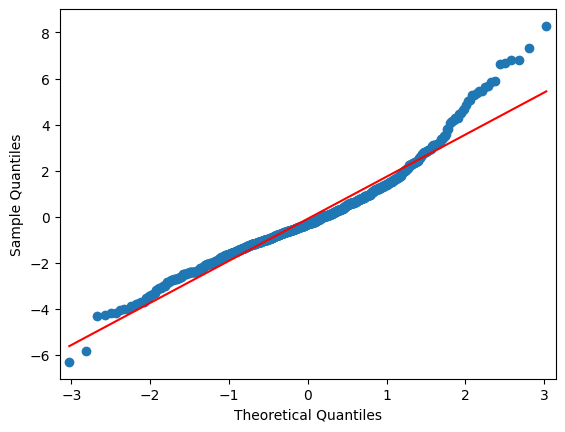

In [59]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
residuals = y_test - best_ann_predicted
sm.qqplot(residuals, line="s") 
plt.show()
#QQ plot’tan görüldüğü gibi artıkların dağılımı uç tarafta normal dağılıma yakın değildir.

##### Model üzerinde farklı teknikler ve dönüşümler polinom vb. kullanarak geliştirilebilir.